### A Simple CNN implementation using Keras
Used only the very necessary commands for excecuting the network. 
Achived above 90% accuracy using the simple model. Run for more than 5 epochs to get the accuracy.

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import confusion_matrix
import numpy as np

from keras.layers import Lambda, Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input, GlobalAveragePooling2D

from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from glob import glob

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['fruits-360_dataset']


In [10]:
!ls ../input/fruits-360_dataset/fruits-360
#Explore the files by changing folder names in above code

LICENSE  Test  Training  papers  readme.md  test-multiple_fruits


In [11]:
train_path = '../input/fruits-360_dataset/fruits-360/Training'
test_path = '../input/fruits-360_dataset/fruits-360/Test'

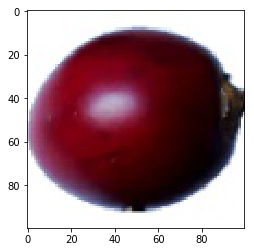

In [12]:
#Just to disply the a roandom image. 
image_files = glob(train_path + '/*/*.jp*g')
import matplotlib.pyplot as plt
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [13]:
# The database is gettting updated very frequently. So better keep a code to find the number of classes.
folders = glob(train_path + '/*')
len(folders)

92

In [14]:
IMAGE_SIZE = [100, 100] 

# training config:
epochs = 5
batch_size = 32

### Used keras Model (functional API) for building the model (not sequential). 
https://keras.io/models/model/

In [15]:
# A very simple convolutional NN using keras, Batch Normalisation is used
inp = Input(shape=(100,100,3))
x = Conv2D(128, (3, 3), padding='same')(inp)
x =BatchNormalization()(x) 
x =Activation('relu')(x)
x =MaxPooling2D(strides = (1,1))(x)


x = Conv2D(64, (3, 3), padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D(strides = (1,1))(x)

# Global average pooling is said to be better than Flatten
x= GlobalAveragePooling2D()(x)


x= Dense(2000, activation = 'relu')(x)
x= Dropout(0.5, noise_shape=None, seed=None)(x)

x= Dense(250, activation = 'relu')(x)
x= Dropout(0.3, noise_shape=None, seed=None)(x)
out = Dense(len(folders),activation = 'softmax')(x)

model = Model(inp,out )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 128)     3584      
_________________________________________________________________
batch_normalization_3 (Batch (None, 100, 100, 128)     512       
_________________________________________________________________
activation_3 (Activation)    (None, 100, 100, 128)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 99, 99, 64)        73792     
_________________________________________________________________
batch_normalization_4 (Batch (None, 99, 99, 64)        256       
__________

In [16]:
#compile the model
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

### Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
https://keras.io/preprocessing/image/

In [ ]:
#Image generator augments image. Here its also used for train, validation split.
datagen = ImageDataGenerator(rotation_range = 20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              #preprocessing_function=preprocess_input,
                              validation_split=0.2,
)

### Flow from directory can be used for datasets of this format.  Images are given in seperate folders which represents different classes
https://keras.io/preprocessing/image/#flow_from_directory

In [ ]:
#Image generator is used to call images using flow from directory. the images are given in format 
#suited for flow_from_directory. Images are given in seperate folders which represents different classes
train_generator = datagen.flow_from_directory(train_path,
                                             target_size = IMAGE_SIZE,
                                             shuffle = 'True',
                                             subset = 'training',
                                             batch_size = batch_size,
                                             class_mode = 'categorical')
valid_generator = datagen.flow_from_directory(train_path,
                                             target_size = IMAGE_SIZE,
                                             shuffle = 'True',
                                             batch_size = 32,
                                             class_mode = 'categorical',
                                             subset = 'validation'
                                             )

In [ ]:
#generator function to fit the model in batches. Run the model for more than 5 epochs 
#to get results above 90
model.fit_generator(train_generator,
                   validation_data = valid_generator,
                    epochs = epochs,
                    steps_per_epoch = train_generator.n // batch_size,
                    validation_steps = valid_generator.n //batch_size,
                    )

In [ ]:
#Test data are not augmented
test_datagen = ImageDataGenerator(rotation_range = 0,
                              width_shift_range=0.0,
                              height_shift_range=0.0,
                              shear_range=0.0,
                              zoom_range=0.0,
                              horizontal_flip=False,
                              vertical_flip=False,
                              #preprocessing_function=preprocess_input,
                              )

In [ ]:
#Test 
test_generator = test_datagen.flow_from_directory(test_path,
                                                 target_size = IMAGE_SIZE,
                                                 shuffle = 'False',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',)

In [ ]:
#Evaluate
model.evaluate_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)

In [ ]:
model.metrics_names